Q1 AND Q2 Chatbotlink:https://chatgpt.com/share/67400b37-6680-8008-9ad4-07e3e85cc2e0

2,1. **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population. This used when the cosnsequences of a false positive and a false negative are equal. For example in e-commerce when deciding whether or not a customer will purchase a product. There is no heavy cost associated with a false positive or negative in this situation.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
    
2. **Sensitivity** measures the proportion of actual positives that are correctly identified. This most suited for the healthacre industry when diagnosing a disease since overlooking a positive diagnosis would be extremely costly. Therefore it makes the most sense to use sensitivity with cases like this. 

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

3. **Specificity** measures the proportion of actual negatives that are correctly identified. This is most suited for suitations where a fasle positive would be costly. For example, looking at legal decisions would require specificity becasue a false positive could end up sentencing someone who is innocent to a lifetime in jail.

$$\text{Specificity} = \frac{TN}{TN + FP}$$

4. **Precision** measures the proportion of positive identifications that were actually correct. This is good for identifying spam emails because precision is focused on tracking false positives. So if an important email is marked as spam that could cause problems.

$$\text{Precision} = \frac{TP}{TP + FP}$$


In [7]:
'''QUESTION 3'''
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'])
ab = ab.dropna()

ab['Pub_Year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

ab_reduced_noNaN = ab

print(ab_reduced_noNaN.head())

# create `ab_reduced_noNaN` based on the specs above

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  Pub_Year  
0    2010.0  1605506249    0.8      2010  
1    2008.0  1416564195 

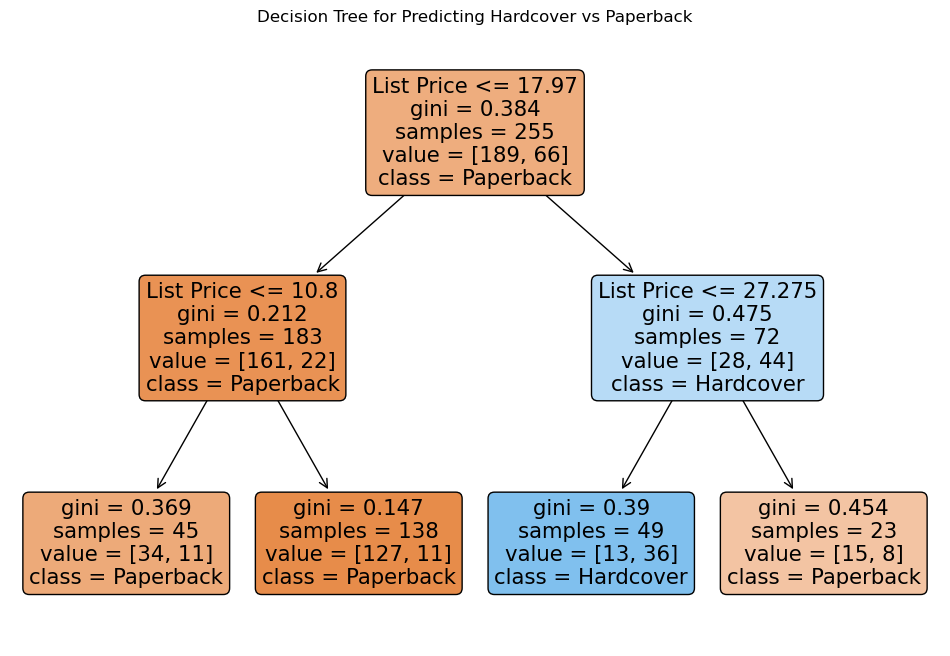

In [14]:
'''QUESTION 4'''
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the data
ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'])  # Drop specified columns
ab = ab.dropna()  # Drop rows with missing values
ab['Pub_Year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Define target and feature
y = pd.get_dummies(ab["Hard_or_Paper"])['H']  # Target: 1 if Hardcover, 0 otherwise
X = ab[['List Price']]  # Feature: List Price

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], rounded=True)
plt.title("Decision Tree for Predicting Hardcover vs Paperback")
plt.show()


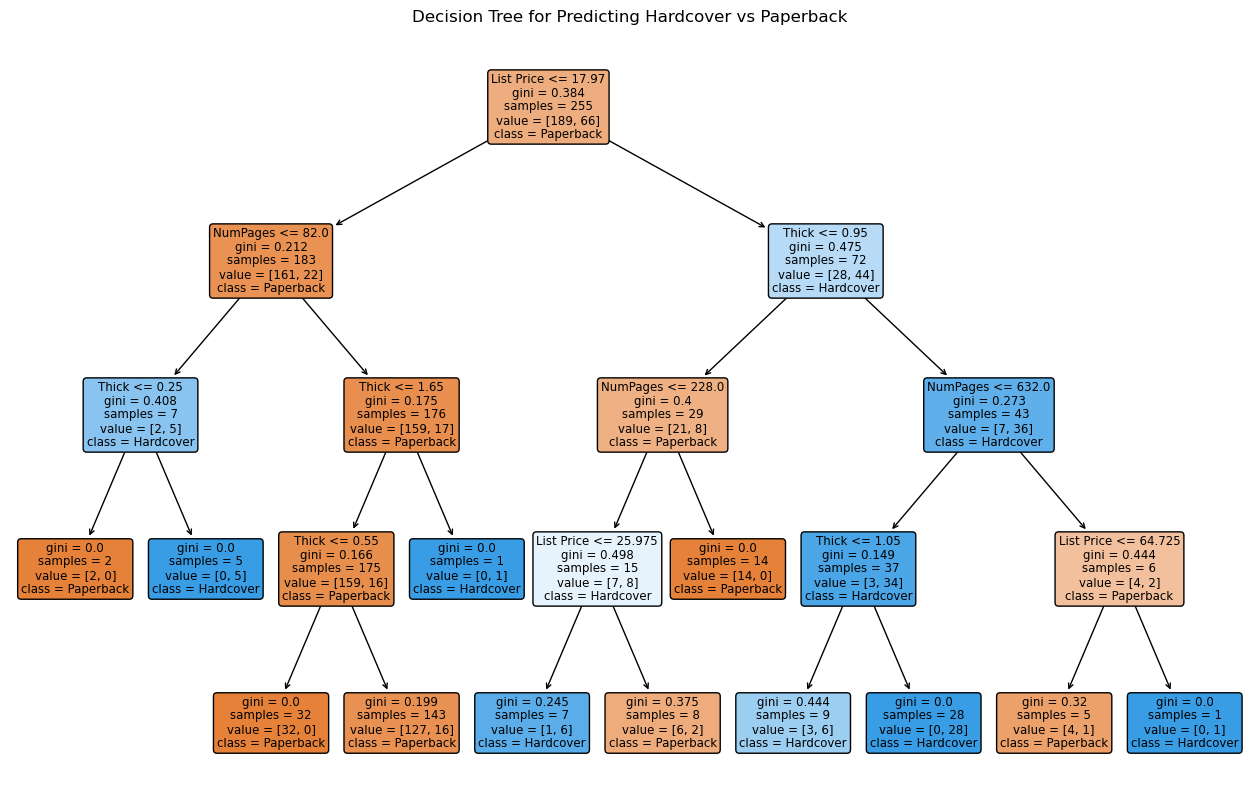

In [16]:
'''QUESTION 6'''
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the data
ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'])  # Drop specified columns
ab = ab.dropna()  # Drop rows with missing values
ab['Pub_Year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Define target and feature
y = pd.get_dummies(ab["Hard_or_Paper"])['H']  # Target: 1 if Hardcover, 0 otherwise
X = ab[['NumPages', 'Thick', 'List Price']]  # Features: NumPages, Thick, and List Price

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier with max_depth=4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(16, 10))  # Adjust the figure size for clarity
plot_tree(clf, 
          filled=True, 
          feature_names=X.columns,  # Updated to show all feature names
          class_names=['Paperback', 'Hardcover'], 
          rounded=True)
plt.title("Decision Tree for Predicting Hardcover vs Paperback")
plt.show()



 7. The first matrix performs worse due to relying only on List Price compared to the second confusion matrix which relied on NumPages Thick and List Price. The lack of columns to rely on may cause more false negatives or positives which is why the first matrix performed worse. Additionally,for clf and clf2 a test set is used which makes the figures calculated by the second method more accurate. 

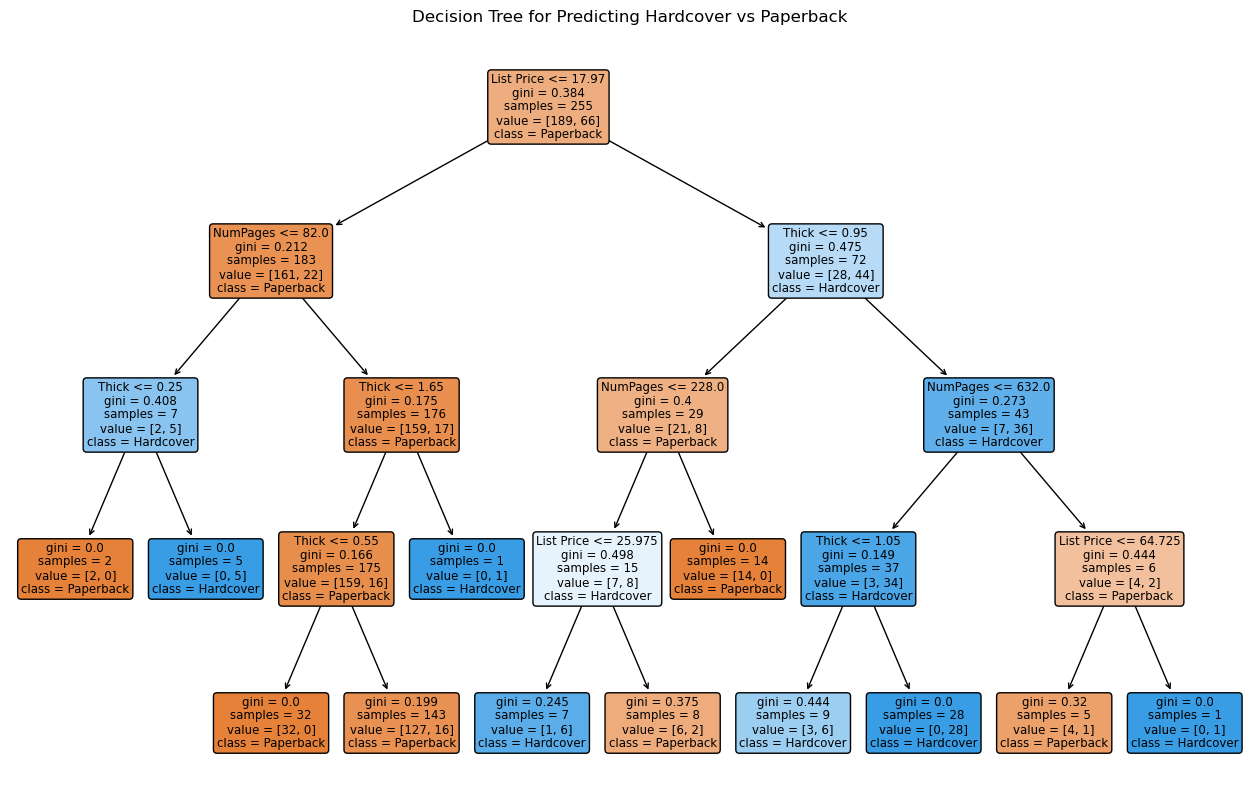

The most important predictor variable is 'List Price' with an importance score of 0.486.


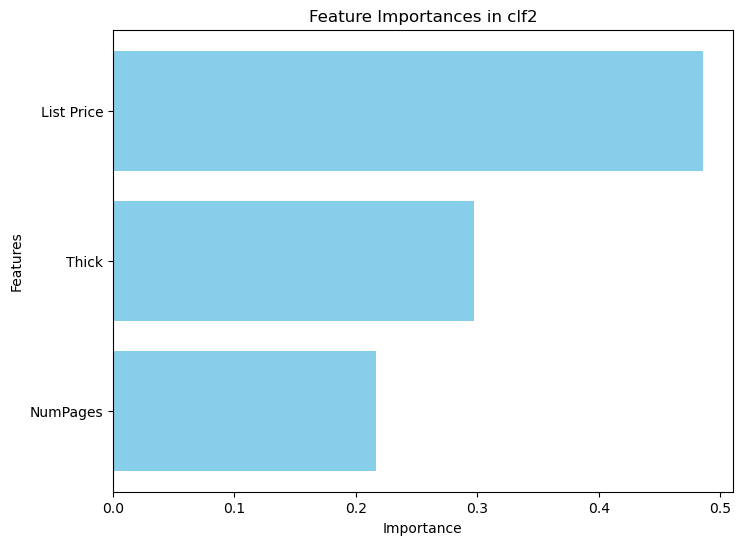

In [6]:
'''QUESTION 8'''
import matplotlib.pyplot as plt
import pandas as pd

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess the data
ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'])  # Drop specified columns
ab = ab.dropna()  # Drop rows with missing values
ab['Pub_Year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Define target and feature
y = pd.get_dummies(ab["Hard_or_Paper"])['H']  # Target: 1 if Hardcover, 0 otherwise
X = ab[['NumPages', 'Thick', 'List Price']]  # Features: NumPages, Thick, and List Price

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(16, 10))  # Adjust the figure size for clarity
plot_tree(clf2, 
          filled=True, 
          feature_names=X.columns,  # Updated to show all feature names
          class_names=['Paperback', 'Hardcover'], 
          rounded=True)
plt.title("Decision Tree for Predicting Hardcover vs Paperback")
plt.show()



# Feature importances and feature names
importances = clf2.feature_importances_  # Relative importance of features
feature_names = clf2.feature_names_in_  # Names of the features used in the model

# Create a pandas DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Report the most important predictor variable
most_important_feature = importance_df.iloc[0]
print(f"The most important predictor variable is '{most_important_feature['Feature']}' "
      f"with an importance score of {most_important_feature['Importance']:.3f}.")

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importances in clf2")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


9. In linear regression, coefficients quantify the precise numerical effect of each predictor variable on the target, assuming all other predictors remain constant. Each coefficient represents the change in the target variable for a one-unit increase in the corresponding predictor. On the other hand, feature importances in decision trees indicate the relative contribution of each feature to the model's overall predictions. However, they do not directly measure the specific relationship between a feature and the target, making them less interpretable in terms of exact effect size.

ChatbotLink: https://chatgpt.com/share/67400bce-b710-8008-856a-4511e9bb8de2

10. Somewhat